In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_derived_data.csv')
df.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,...,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,...,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,...,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,...,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,...,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1


In [3]:
globalsales = pd.DataFrame(df["Global_Sales"])
globalsales.head()

,Global_Sales
0,82.53
1,35.52
2,32.77
3,29.80
4,28.92


In [4]:
userscore = pd.DataFrame(df["User_Score"])
userscore.head()

,User_Score
0,8.0
1,8.3
2,8.0
3,8.5
4,6.6


In [5]:
jointdf = pd.DataFrame(df[["Global_Sales", "User_Score"]])
jointdf

,Global_Sales,User_Score
0,82.53,8.0
1,35.52,8.3
2,32.77,8.0
3,29.80,8.5
4,28.92,6.6
...,...,...
6885,0.01,8.8
6886,0.01,7.6
6887,0.01,5.8
6888,0.01,7.2


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
globalsales_train, globalsales_test = train_test_split(globalsales, test_size=0.2, random_state=1)
globalsales_train

,Global_Sales
4647,0.15
6790,0.01
5291,0.10
5079,0.12
3766,0.24
...,...
905,1.37
5192,0.11
3980,0.22
235,3.65


In [8]:
userscore_train, userscore_test = train_test_split(userscore, test_size=0.2, random_state=1)
userscore_train

,User_Score
4647,7.9
6790,8.5
5291,7.6
5079,8.0
3766,8.1
...,...
905,8.2
5192,8.8
3980,6.8
235,7.9


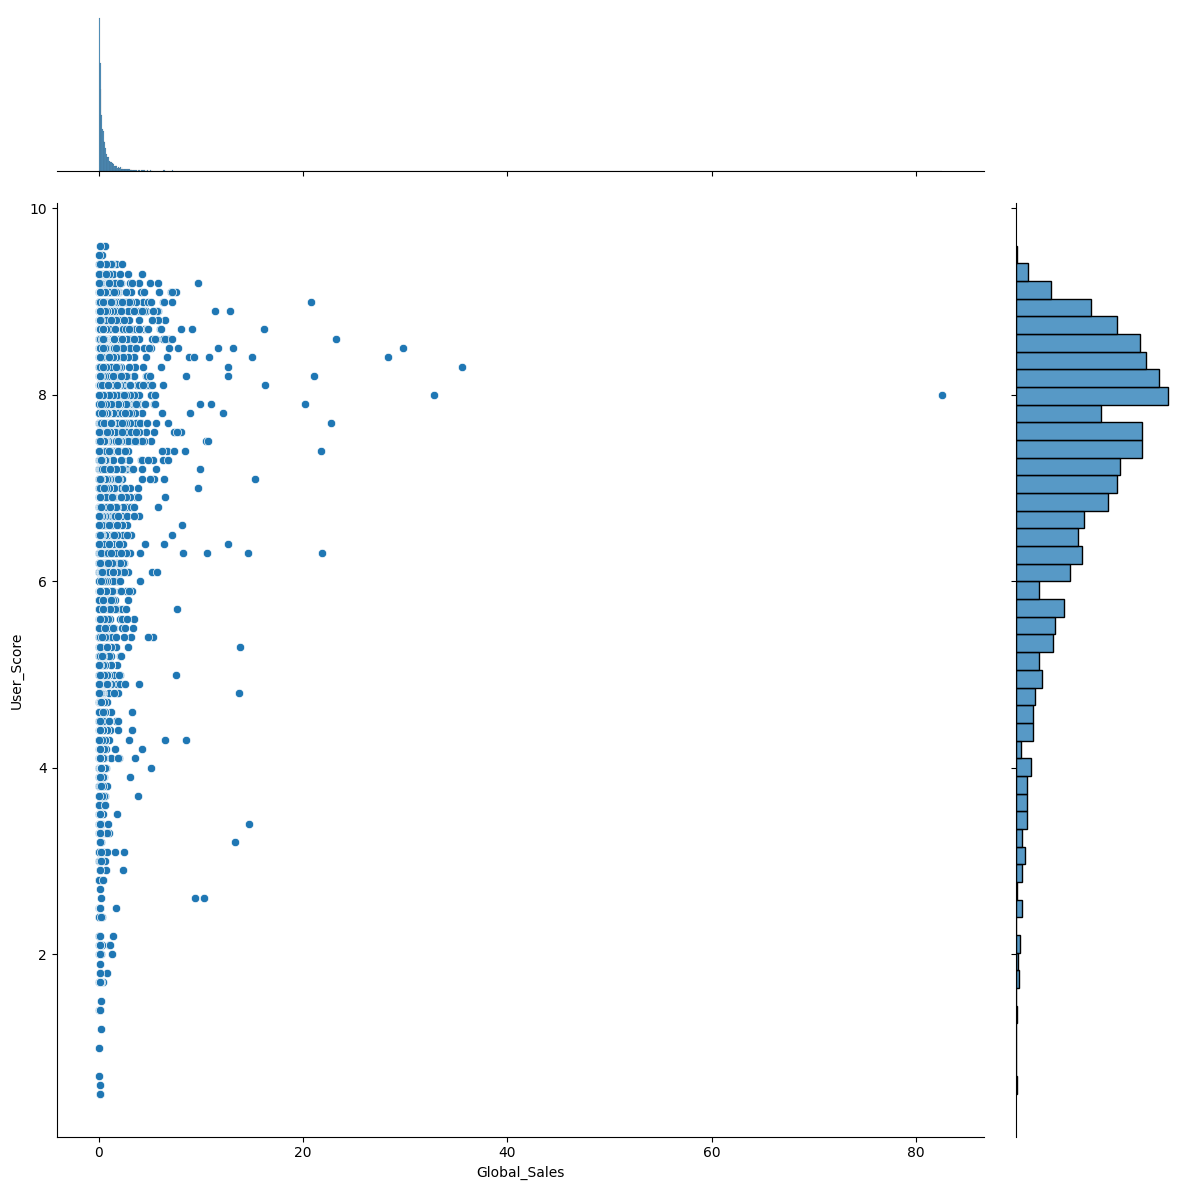

In [10]:
trainDF = pd.concat([globalsales_train, userscore_train], axis = 1).reindex(globalsales_train.index)
sb.jointplot(data = trainDF, x = "Global_Sales", y = "User_Score", height = 12)

<AxesSubplot: >

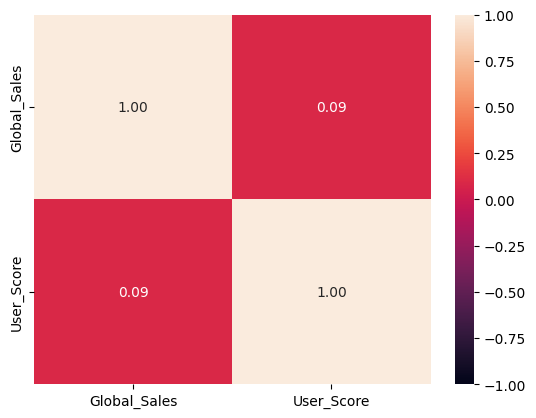

In [11]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")